In [ ]:
#데이터 전처리 코드는 숨겨놓았습니다.

In [2]:
#데이터 전처리 코드
import pandas as pd
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


train= pd.read_csv('train.csv')
building_info = pd.read_csv('building_info.csv')

train= train.rename(columns={
    '건물번호': 'building_id',
    '일시': 'date_time',
    '기온(C)': 'temp',
    '강수량(mm)': 'rainfall',
    '풍속(m/s)': 'windspeed',
    '습도(%)': 'humidity',
    '일조(hr)': 'sunshine',
    '일사(MJ/m2)': 'solar_radiation',
    '전력소비량(kWh)': 'power_consumption',
})
train.drop('num_date_time', axis=1, inplace=True)
train.head()

building_info = building_info.rename(columns={
    '건물번호': 'building_id',
    '건물유형': 'building_type',
    '연면적(m2)': 'total_area',
    '냉방면적(m2)': 'cooling_area',
    '태양광용량(kW)': 'solar_power_cap',
    'ESS저장용량(kWh)': 'ess_cap',
    'PCS용량(kW)': 'pcs_cap',
})
translation_dict = {
    '건물기타': 'Other Buildings',
    '공공': 'Public',
    '대학교': 'University',
    '데이터센터': 'Data Center',
    '백화점및아울렛': 'Department Store and Outlet',
    '병원': 'Hospital',
    '상용': 'Commercial',
    '아파트': 'Apartment',
    '연구소': 'Research Institute',
    '지식산업센터': 'Knowledge Industry Center',
    '할인마트': 'Discount Mart',
    '호텔및리조트': 'Hotel and Resort'
}
building_info['building_type'] = building_info['building_type'].replace(translation_dict)
building_info.head()

train= pd.merge(train, building_info, on='building_id', how='left')

train['date_time'] = pd.to_datetime(train['date_time'], format='%Y%m%d %H')
train['hour'] = train['date_time'].dt.hour
train['day'] = train['date_time'].dt.day
train['month'] = train['date_time'].dt.month
train['year'] = train['date_time'].dt.year
train.head()

train['rainfall'] = train['rainfall'].fillna(0)
train=train.drop(['sunshine','solar_radiation'],axis=1)

print(len(train[train['solar_power_cap'] == '-']))
print(len(train[train['ess_cap'] == '-']))
print(len(train[train['pcs_cap'] == '-']))

train = train.drop(['solar_power_cap', 'ess_cap', 'pcs_cap'], axis=1)

train['windspeed'].fillna(method='ffill', inplace=True)
train['humidity'].fillna(method='ffill', inplace=True)


130560
193800
193800


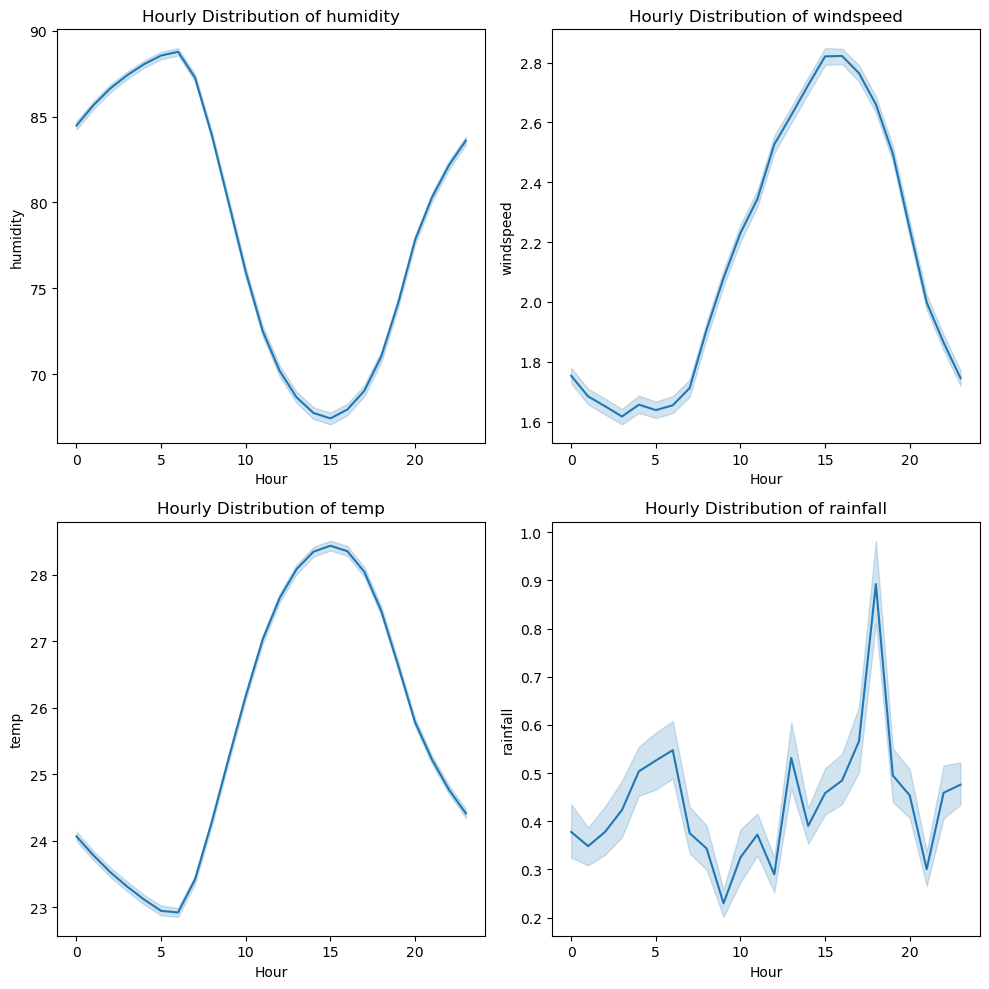

In [3]:
#시간별 환경 요소 변화 plot

variables = ['humidity', 'windspeed', 'temp', 'rainfall']

fig, axs = plt.subplots(2, 2, figsize=(10, 10))
axs = axs.ravel()  
for i, var in enumerate(variables):
    sns.lineplot(x='hour', y=var, data=train, ax=axs[i])
    axs[i].set_title(f'Hourly Distribution of {var}')
    axs[i].set_xlabel('Hour')
    axs[i].set_ylabel(var)

plt.tight_layout()
plt.show()

#시간 평균 소비 전력 그래프와 비교하였을 때, temp, windfall column이 유사함


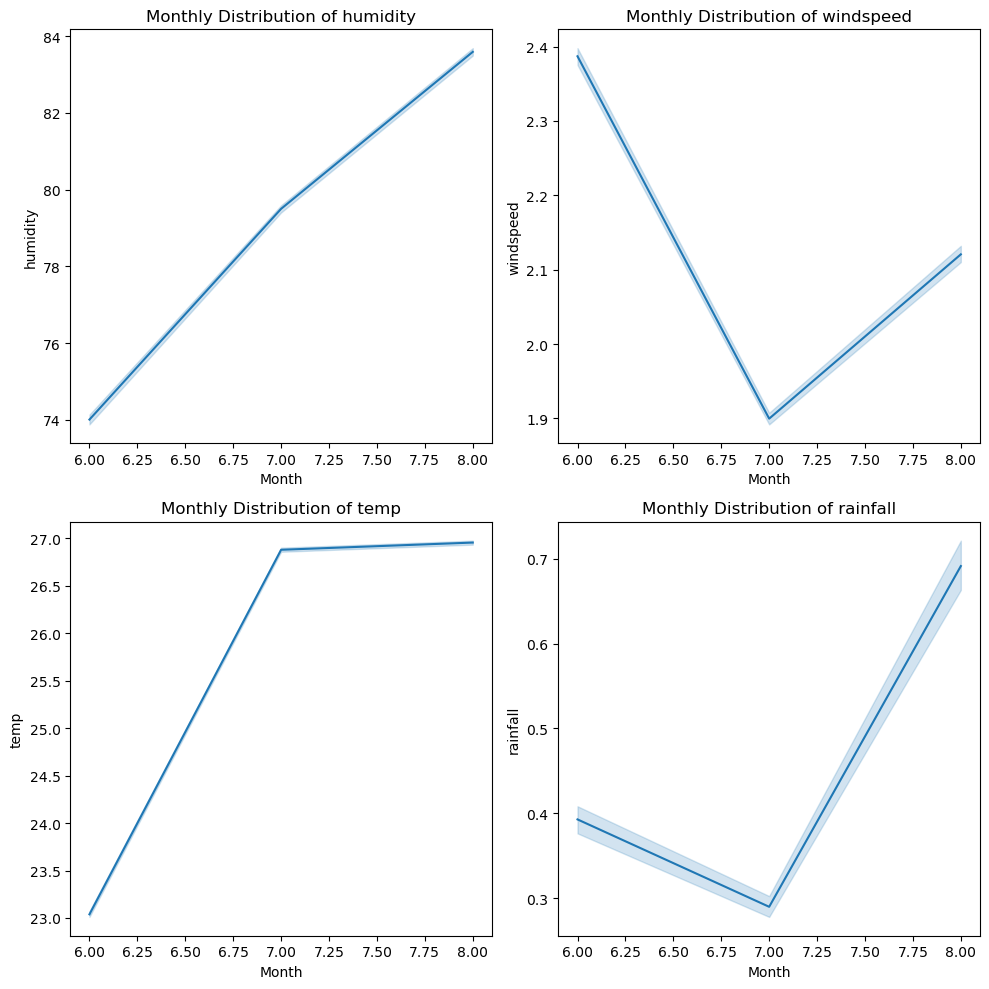

In [49]:
#월별 환경 요소 변화 plot
fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i, var in enumerate(variables):
    row = i // 2
    col = i % 2
    sns.lineplot(x='month', y=var, data=train, ax=axs[row, col])
    axs[row, col].set_title(f'Monthly Distribution of {variables[i]}')
    axs[row, col].set_xlabel('Month')
    axs[row, col].set_ylabel(variables[i])

plt.tight_layout()
plt.show()

# 월별 평균 소비 전력 그래프와 비교하였을 때, temp, humidity 유사

#시간 평균 그래프와 해당 그래프 모두 일치하는 temp 칼럼이 가장 연관성이 높음

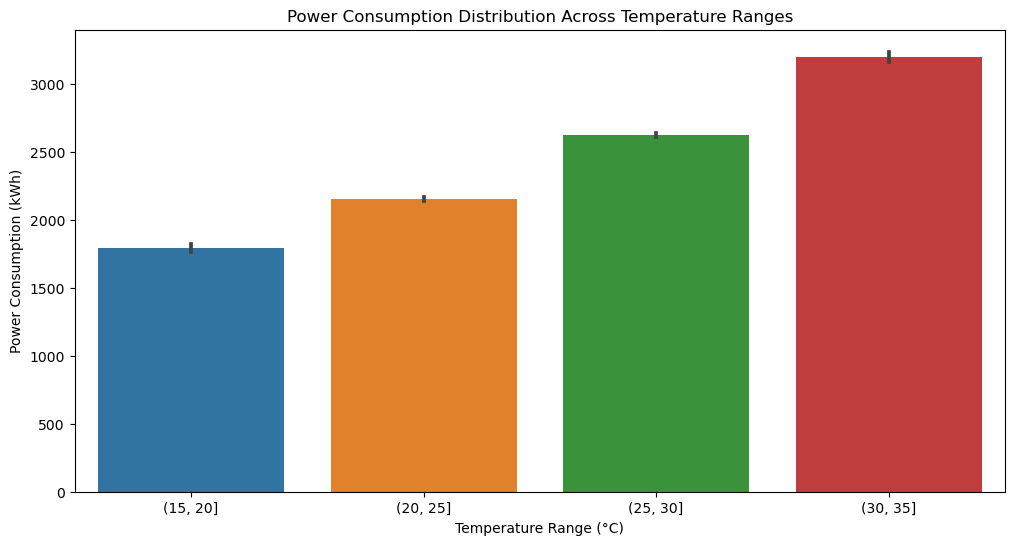

In [15]:
# 온도 범위별 전력 소비량의 분포

train['temp_range'] = pd.cut(train['temp'], bins=[15, 20,25, 30,35])
plt.figure(figsize=(12, 6))
sns.barplot(x='temp_range', y='power_consumption', data=train)
plt.title('Power Consumption Distribution Across Temperature Ranges')
plt.xlabel('Temperature Range (°C)')
plt.ylabel('Power Consumption (kWh)')
plt.show()
